In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer_pca.csv'
data = pd.read_csv(file_url)
data # 데이터셋 불러오고 출력

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
96,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
97,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0
98,-0.940815,-0.807895,-1.093267,-1.342878,-0.676572,-1.287731,-1.305887,-1.463747,-1.050452,-0.895722,-0.708094,0.954537,0


In [3]:
customer_X = data.drop('label',axis=1) # 독립변수 지정
customer_y = data['label'] # 종속변수 지정

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원 평면에 그래프를 그리는 것이 목적이기 때문에 2개의 주성분만 설정
customer_pca = pca.fit_transform(customer_X)

In [5]:
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [6]:
customer_pca = pd.DataFrame(customer_pca,columns=['PCA1','PCA2'])
customer_pca = customer_pca.join(customer_y) # 데이터 합치기

In [7]:
customer_pca.head()

,PCA1,PCA2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

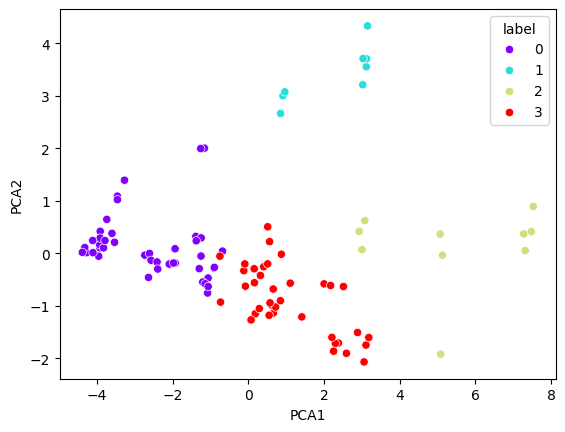

In [8]:
sns.scatterplot(x='PCA1',y='PCA2',hue='label',data=customer_pca,palette='rainbow')

In [9]:
pca.components_ # 주성분과 변수의 관계 확인

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [10]:
df_comp = pd.DataFrame(pca.components_,columns=customer_X.columns)
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<Axes: >

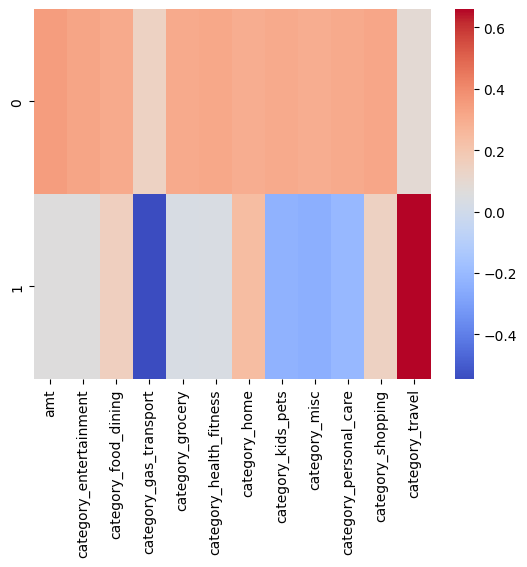

In [11]:
sns.heatmap(df_comp,cmap='coolwarm')

In [13]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
data = pd.read_csv(file_url)
data

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.257770,0.122200,0.348620,0.129570,0.438460,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.153160,0.140620,-0.030201,0.101340,-0.145460,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.401220,0.137900,0.138350,0.157460,0.512160,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,-0.155870,-0.266860,0.158930,-0.132040,0.322210,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.000000,0.000000,0.56758,0.0,0.00000,0.0000,0.00000,0.825850,0.83788,...,0.240200,0.446050,-0.163560,0.453110,0.590730,0.356800,0.395780,0.035871,-0.293430,0.38124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.003989,0.316790,0.00000,0.0,0.75463,0.0000,0.54697,2.011200,0.00000,...,-0.091805,-0.032054,0.229830,-0.087756,0.276940,-0.322200,-0.053252,-0.156980,-0.043542,0.12565
19996,0,0.000000,2.601400,1.81890,0.0,0.00000,0.0000,0.25596,0.090454,0.00000,...,-0.369120,-0.384540,0.048926,0.383610,0.273910,-0.034337,-0.264020,0.016412,0.320100,0.25905
19997,0,0.000000,2.298500,0.95090,0.0,0.88928,0.0000,0.15201,0.000000,0.00000,...,-0.397390,0.317710,-0.215280,0.229490,0.190690,0.158690,0.185860,0.208300,0.082322,0.07128
19998,0,0.227150,0.049184,1.52300,0.0,1.44170,1.9881,0.57948,0.634800,0.00000,...,-0.368830,-0.271760,-0.006920,-0.235180,0.347830,0.534220,0.410420,0.172900,-0.204870,0.17142


In [15]:
data['class'].value_counts()

0    15000
1     5000
Name: class, dtype: int64

In [17]:
data.isnull().sum().sum()

0

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=100)

In [19]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled.fit(X_train)

StandardScaler()

In [20]:
X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100)
model_1.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=100)

In [26]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

pred_1 = model_1.predict(X_test_scaled)

accuracy_score(y_test,pred_1)

0.958

In [29]:
proba_1 = model_1.predict_proba(X_test_scaled)
proba_1 = proba_1[:,1]

roc_auc_score(y_test,proba_1)

0.9982541957107813

In [30]:
pca =PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [32]:
pca.explained_variance_ratio_ # 데이터 반영 비율 확인

# 기존 데이터의 0.08 정도만 반영한다는 의미

array([0.04992445, 0.03331407])

In [33]:
var_ratio = []
for i in range(100,550,50) :
    pca = PCA(n_components=i)
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum() # 데이터 반영 비율의 합을 구한다.
    var_ratio.append(ratio)

<Axes: >

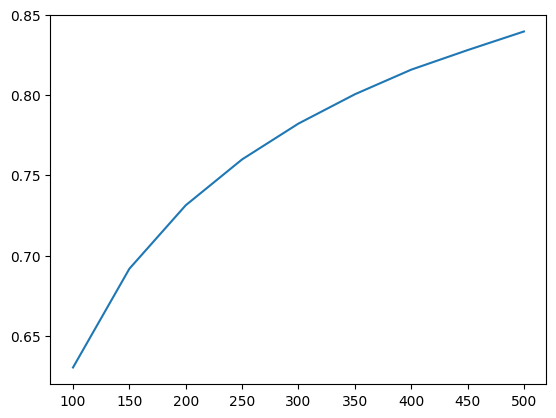

In [34]:
sns.lineplot(x=range(100,550,50),y=var_ratio)
# 주성분 수를 100에서 500까지 확인한 결과 데이터의 반영 비율이 62%~82% 이다. 

In [35]:
pca = PCA(n_components=400,random_state=100)
pca.fit(X_train_scaled)

PCA(n_components=400, random_state=100)

In [36]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [37]:
model_2 = RandomForestClassifier(random_state=100)
model_2.fit(X_train_pca,y_train)

RandomForestClassifier(random_state=100)

In [39]:
pred2 = model_2.predict(X_test_pca)
pred2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [40]:
accuracy_score(y_test,pred2)

0.98925

In [43]:
pred_proba = model_2.predict_proba(X_test_pca)
pred_proba = pred_proba[:,1]

roc_auc_score(y_test,pred_proba)

0.9982517669346417